# 10장 - 회귀 분석으로 연속적 타깃 변수 예측

회귀 모델은 연속적인 타깃 변수를 예측하는 데 사용되기 때문에 산업 현장의 애플리케이션은 물론 과학 문제를 해결하기 위한 매력적인 도구이다.  
변수 간의 관계를 이해하거나 트렌드를 분석하고 날씨를 예측할 수 있다.  
한 가지 예로 향후 몇 달간 회사 영업 실적을 예측할 수 있다. 

In [19]:
from IPython.display import Image

# 선형 회귀

선형 회귀는 하나 이상의 특성과 연속적인 타깃 변수 사이의 관계를 모델링하는 것이 목적이다.  
지도 학습의 다른 카테고리인 분류 알고리즘과 달리 회귀는 범주형 클래스 레이블이 아니라 연속적인 출력 값을 예측한다.  

## 단순 선형 회귀

**단순 선형 회귀**는 하나의 특성(**설명 변수**(explanatory variable) $x$)과 연속적인 타깃(**응답 변수**(response variable) $y$) 사이의 관계를 모델링 한다.  
특성이 하나인 선형 모델 공식은 다음과 같다.  
$$y=w_{0}+w_{1}x$$  

여기서 $w_{0}$는 $y$축 절편을 나타내고 $W_{1}$은 특성의 가중치이다. 특성과 타깃 사이의 관계를 나타내는 선형 방정식의 가중치를 학습하는 것이 목적이다.  
이 방정식으로 훈련 데이터셋이 아닌 새로운 샘플의 타깃 값을 예측할 수 있다.

In [20]:
Image(url='https://git.io/Jts3N', width=500) 

데이터에 가장 잘 맞는 이런 직선을 **회귀 직선**(regression line)이라고도 한다. 회귀 직선과 훈련 샘플 사이의 직선 거리를 **오프셋**(offset) 또는 예측 오차인 잔차(residual)라고 한다. 

## 다중 선형 회귀

이전 절에서 소개한 선형 회귀처럼 특성이 하나인 특별한 경우를 단순 선형 회귀라고 한다. 당연히 선형 회귀 모델은 여러 개의 특성이 있는 경우로 일반화할 수 있다. 이를 **다중 선형 회귀**라고 한다.  
$$y=w_{0}x_{0}+w_{1}x_{1}+\cdots+w_{m}x_{m} = \sum^{m}_{t=0}w_{i}x_{i}=w^{T}x$$  

여기서 $w_{0}$는 $y$축의 절편이고 $x_{0}=1$이다.  

정적인 이미지로 그려진 다변량 회귀의 초평면은 3차원 산점도만 되어도 이해하기 어렵다. (세 개 또는 그 이상의 특성에서 학습한 다변량 회귀 모델의) 산점도에서 2차원 초평면을 시각화하는 좋은 방법이 없기 때문에 이 장에서는 단변량 회귀를 사용하여 하나의 특성을 가진 예제와 그래프를 주로 다룬다.  
단변량 회귀와 다변량 회귀는 같은 개념과 평가 기법을 사용하기 때문에 이 장에서 나오는 코드는 두 종류의 회귀 모델에 모두 호환된다. 

# 주택 데이터셋 탐색

첫 번째 선형 회귀 모델을 만들기 전에 새로운 주택 데이터셋을 소개한다.  
이 데이터셋은 1978년에 해리슨(D. Harrison)과 루빈펠드(D. L. Rubinfeld)가 수집한 보스터 교외 지역의 주택 정보를 담고 있다. 

## 데이터프레임으로 주택 데이터셋 읽기

- CRIM: 도시의 인당 범죄율
- ZN: 2만 5,000평방 피트가 넘는 주택 비율
- INDUS: 도시에서 소매 업종이 아닌 지역 비율
- CHAS: 찰스 강 인접 여부(강 주변=1, 그 외=0)
- NOX: 일산화질소 농도(10ppm당)
- RM: 주택의 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 주택 비율
- DIS: 다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
- RAD: 방사형으로 뻗은 고속도로까지 접근성 지수
- TAX: 10만 달러당 재산세율
- PTRATIO: 도시의 학생-교사 비율
- B: $1000(Bk-0.63)^2$, 여기서 Bk는 도시의 아프라카계 미국인 비율
- LSTAT: 저소득 계층의 비율
- MEDV: 자가 주택의 중간 가격(1,000달러 단위)  

이 장 나머지 부분에서는 주택 가격(MEDV)을 타깃 값으로 삼는다.  
13개의 특성 중 하나 이상을 사용하여 이 값을 예측하자.

In [21]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 데이터셋의 중요 특징 시각화

탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 머신 러닝 모델을 훈련하기 전에 첫 번째로 수행할 중요하고 권장되는 단계이다.  
이 절 나머지 부분에서 EDA 그래픽 도구 중에서 간단하지만 유용한 기법들을 사용해본다. 이런 도구는 이상치를 감지하고 데이터 분포를 시각화하거나 특성 간의 관계를 나타내는 데 도움이 된다.  

먼저 **산점도 행렬**(scatter plot)을 그려서 데이터셋에 있는 특성 간의 상관관계를 한 번에 시각화해 보자. 

In [22]:
!pip install mlxtend

In [23]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

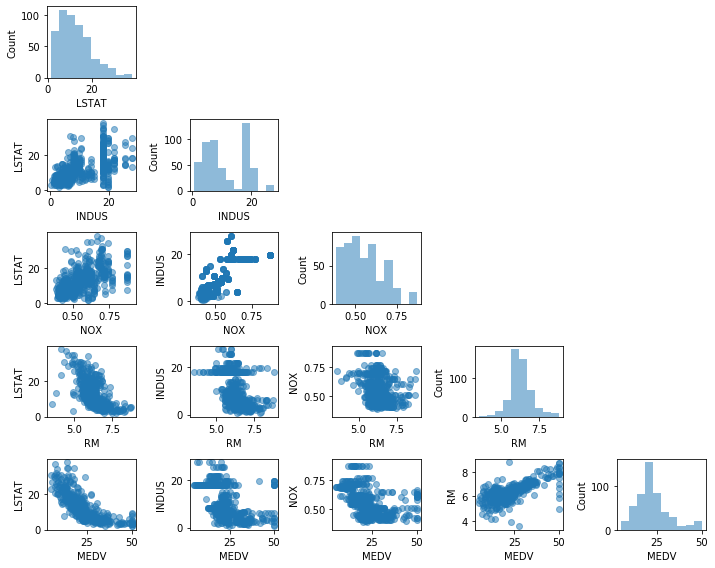

In [24]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

제한된 지면 때문에 한눈에 볼 수 있도록 데이터셋에서 LSTAT, INDUS, NOX, RM, MEDV 다섯 개의 열만 산점도 행렬에 포함시켰다.  
산점도 행렬을 사용하면 데이터가 어떻게 분포되어 있는지, 이상치를 포함하고 있는지 빠르게 확인할 수 있다.  
예를 들어 RM과 주택 가격인 MEDV 사이에 선형적인 관계가 있다는 것을 알 수 있다. 또 오른쪽 맨 아래에서 MEDV의 히스토그램을 볼 수 있다. 이 데이터는 일부 이상치가 있지만 정규 분포 형태를 띠고 있다. 

## 상관관계 행렬을 사용한 분석

이전 절에서 히스토그램과 산점도로 주택 데이터셋 특성들의 분포를 그려 보았다. 다음으로 **상관관계 행렬**(correlation matrix)을 만들어 변수 간의 선형 관계를 정량화하고 요약해보자.  

상관관계 행렬은 5장의 '주성분 분석을 통한 비지도 차원 축소' 절에서 본 **공분산 행렬**(covariance matrix)과 밀접하게 관련되어 있다. 직관적으로 생각하면 상관관계 행렬을 스케일 조정된 공분산 행렬로 생각할 수 있다. 사실 특성이 표준화되어 있으면 행렬과 공분산 행렬이 같다.  

상관관계 행렬을 **피어슨 상관관계 계수**(Pearson product-momoent correlation coefficient)를 포함하고 있는 정방 행렬이다. 이 계수는 특성 사이의 선형 의존성을 측정한다. 상관관계 계수의 범위는 -1~1이다.  
$r=1$이면 두 특성이 완벽한 양의 상관관계를 가진다. $r=0$이면 아무런 상관관계가 없다. $r=-1$이면 완벽한 음의 상관관계를 가진다.

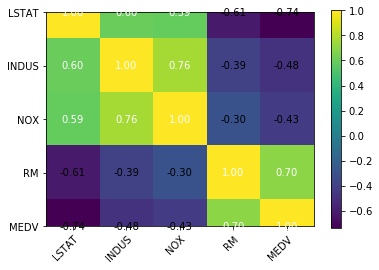

In [25]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()


상관관계 행렬은 선형 상관관계를 바탕으로 특성을 선택하는 데 유용한 정보를 요약해 준다.  
선형 회귀 모델을 훈련하려면 타깃 변수 MEDV와 상관관계가 높은 특성이 좋다.   
이 상관관계 행렬을 살펴보면 타깃 변수 MEDV가 LSTAT와 높다.(-0.74) 산점도 행렬에서 보았던 것을 떠올리면 LSTAT와 MEDV 사이의 관계는 확실히 비선형적이다.  
한편 RM과 MEDV 사이의 상관관계도 비교적 높다.(0.7) 산점도 행렬에서 이 두 변수가 선형 관계를 가지므로 다음 절에서 간단한 선형 회귀 개념을 소개할 때 RM이 선택하기 좋은 특성으로 보인다.

# 최소 제곱 선형 회귀 모델 구현

훈련 샘플까지 수직 거리(잔차 또는 오차)의 제곱합을 최소화하는 선형 회귀 직선의 모델 파라미터를 추정하는 방법이다.

## 경사 하강법으로 회귀 모델의 파라미터 구하기

아달린의 경사 하강법 코드에서 단위 계산 함수를 제거하여 첫 번째 선형 회귀 모델을 구현.

In [26]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

주택 데이터셋에서 RM(방 개수) 변수를 특성으로 사용하여 MEDV(주택 가격)를 예측하는 모델을 훈련시켜 보자. 또 경사 하강법 알고리즘이 잘 수렴 하도록 특성을 표준화 전처리하자.

In [27]:
X = df[['RM']].values
y = df['MEDV'].values

In [28]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [29]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

`np.newaxis` 와 `flatten`을 사용하여 `y_std`를 계산한다.  
사이킷런에 있는 대부분의 변환기는 데이터가 2차원 배열로 저장되어 있다고 기대한다. 앞 코드에서 `y[:, np.newaxis]`에 사용된 `np.newaxis`는 배열에 새로운 차원을 추가한다.  
`StandardScaler`가 스케일 조정된 결과를 반환하면 `flatten()`메서드를 사용하여 원래 1차원 배열 형태로 되돌렸다.  

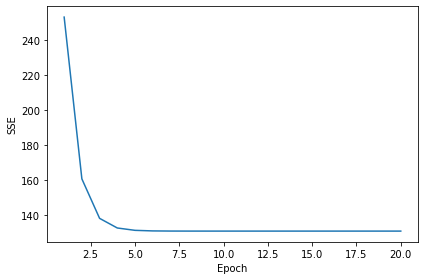

In [30]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('images/10_05.png', dpi=300)
plt.show()

경사 하강법 알고리즘은 다섯 번째 에포크에서 수렴했다.

In [31]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

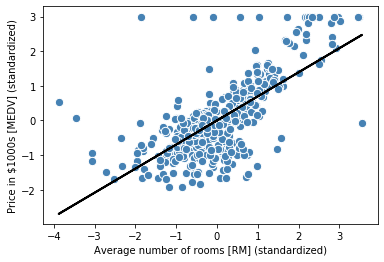

In [32]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

# plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [33]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


이 선형 회귀 직선은 방 개수가 늘어남에 따라 주택 가격이 증가하는 일반적인 경향을 반영하고 있다.  

이런 경향은 매우 직관적으로 보이지만, 이 데이터는 방 개수가 주택 가격을 잘 설명하지 못하는 경우도 많다는 것을 알려준다.  
$y=3$인 직선에 여러 데이터 포인트가 늘어서 있다. 이 지점에서 초과되는 가격을 잘라 냈다는 것을 의미한다. 어떤 애플리케이션에서는 예측된 출력 값을 원본 스케일로 복원하여 제공해야 한다.  
예측한 가격을 1,000달러 단위 가격으로 되돌리려면 간단하게 `StandardScaler`의 `inverse_transform`메서드를 호출하면 된다.

In [35]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))

$1,000 단위 가격: 10.840


앞서 훈련한 선형 회귀 모델을 사용하여 다섯 개의 방을 가진 주택 가격을 예측했다. 모델은 이런 주택 가격을 1만 840달러로 산정했다.  

표준화 처리된 변수를 사용할 때 기술적으로는 절편을 업데이트할 필요가 없다. 이 경우에는 y축 절편이 항상 0이기 때문이다. 

## 사이킷런으로 회귀 모델의 가중치 추정

사이킷런의 선형 회귀 구현은 표준화되지 않은 특성에도 잘 동작한다.  
경사 하강법 기반의 최적화를 사용하지 않기 때문에 표준화 전처리 단계를 건너뛸 수 있다.

In [36]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


사이킷런의 `LinearRegression`을 표준화되지 않은 RM과 MEDV 변수에 훈련시키면 특성이 표준화되지 않았기 때문에 모델의 가중치가 달라진다. 하지만 RM에 대한 MEDV 그래프를 그려서 직접 만든 경사 하강법 구현과 비교해 보면 데이터를 비슷하게 잘 학습했다는 것을 알 수 있다. 

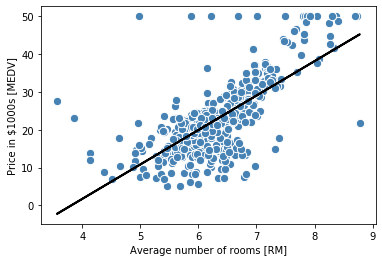

In [37]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

# plt.savefig('images/10_07.png', dpi=300)
plt.show()

# RANSAC을 사용하여 안정된 회귀 모델 훈련

선형 회귀 모델은 이상치(outlier)에 크게 영향을 받을 수 있다. 어떤 상황에서는 데이터의 아주 작은 일부분이 추정 모델의 가중치에 큰 영향을 끼친다.  

이상치를 제거하는 방식 대신 RANSAC(RANdom SAmple Consensus) 알고리즘을 사용하는 안정된 회귀 모델에 대해 알아보자. 이 알고리즘은 정상치(inlier)라는 일부 데이터로 회귀 모델을 훈련한다.  
반복적인 RANSAC 알고리즘을 다음과 같이 정리할 수 있다. 
1. 랜덤하게 일부 샘플을 정상치로 선택하여 모델을 훈련한다. 
2. 훈련된 모델에서 다른 모든 포인트를 테스트한다. 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가한다. 
3. 모든 정상치를 사용하여 모델을 다시 훈련한다.
4. 훈련된 모델과 정상치 간의 오차를 추정한다.
5. 성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘을 종료한다. 그렇지 않으면 단계 1로 돌아간다.  


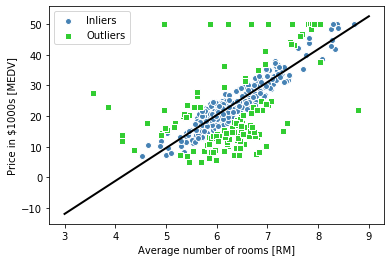

In [41]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)
'''
RANSACRegressor의 최대 반복 회수를 100으로 설정. 
min_samples=50으로 하여 랜덤하게 선택할 샘플의 최소 개수를 50개로 지정.
loss 매개변수의 값으로 'absolute_error'를 사용하면 알고리즘이 학습한 직선과 샘플 포인트 간 수직 거리의 절댓값을 계산한다.
residual_threshold 매개변수를 0.5으로 설정하여 학습한 직선과 수직 거리가 5 이내에 있는 정상 샘플만 포함시킨다.
'''

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

# plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [42]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


RANSAC을 사용하면 데이터셋에 있는 이상치의 잠재적인 영향을 감소시킨다. 하지만 이 방법이 본 적 없는 데이터에 대한 예측 성능에 긍정적인 영향을 미치는지 미치지 못하는지 알지 못한다.

# 선형 회귀 모델의 성능 평가

6장에서 배운 것을 떠올리면 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누어 훈련 데이터셋에서는 모델을 훈련하고 테스트 데이터셋에서는 일반화 성능을 추정하기 위해 처음 본 데이터에서 성능을 평가했다.  
여기서는 간단한 회귀 모델 대신에 데이터셋에 있는 모든 변수를 사용하여 다변량 회귀 모델을 훈련한다.

In [43]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [44]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

모델이 여러 개의 특성을 사용하기 때문에 2차원 그래프로 선형 회귀 직선(정확히 말하면 초평면(hyperplane))을 그릴 수 없다. 그 대신 회귀 모델을 조사하기 위해 잔차(실제 값과 예측 값 사이의 차이 또는 수직 거리)대 예측 값 그래프를 그릴 수 있다.  
**잔차 그래프**(residual plot)는 회귀 모델을 진단할 때 자주 사용하는 그래프 도구이다. 비선형성과 이상치를 감지하고 오차가 랜덤하게 분포되어 있는지를 확인하는 데 도움이 된다.

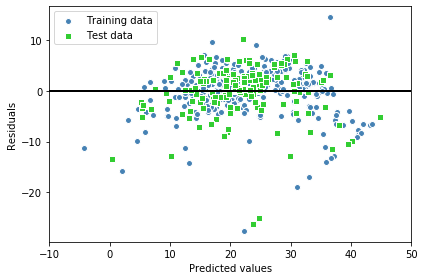

In [45]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

예측이 완벽하면 잔차는 정확이 0이 된다. 현실적으로 실제 애플리케이션에서는 절대 일어나지 않을 것이다.  
좋은 회귀 모델이라면 오차가 랜덤하게 분포되고 잔차는 중앙성 주변으로 랜덤하게 흩어져야 한다. 잔차 그래프에 패턴이 나타나면 특성에서 어떤 정보를 잡아내지 못하고 잔차로 새어 나갔다고 말한다.  
앞선 잔차 그래프에서 이런 현상을 조금 볼 수 있다. 또 잔차 그래프를 사용하여 이상치를 감지할 수 있다. 중앙선에서 큰 편차를 낸 포인트이다.  

모델 성능을 정량적으로 측정하는 또 다른 방법은 **평균 제곱 오차**(Mean Squared Error, MSE)이다.  
이 값은 선형 회귀 모델을 훈련하기 위해 최소화하는 제곱 오차합(SSE)의 평균이다. MSE는 그리드 서치와 교차 검증에서 매개변수를 튜닝하거나 여러 다른 회귀 모델을 비교할 때 유용하다.

In [47]:
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))


훈련 MSE: 19.958, 테스트 MSE: 27.196


훈련 데이터셋의 MSE가 19.96이고 테스트 데이터셋의 MSE는 27.20으로 훨씬 크다.  
이는 모델이 훈련 데이터셋에 과대적합되었다는 신호이다. 하지만 분류 정확도와 달리 MSE는 값에 제한이 없다. 다른 말로 하면 주택 가격이 1,000 단위로 기록되어 있다면 동일한 모델이 1,000을 곱하지 않은 데이터로 훈련한 모델보다 더 낮은 MSE를 만든다.  

따라서 **결정 계수**(coefficient of determination, $R^2$)가 더 유용할 수 있다. 결정 계수는 모델 성능을 잘 해석하기 위해 만든 MSE의 표준화된 버전으로 생각할 수 있다.  
다른 말로 하면 $R^2$은 타깃 분산에서 모델이 잡아낸 비율이다.  
$$R^2= 1-{SSE \over SST}$$  

여기서 SSE는 제곱 오차합이고 SST(total sum of sqaures)는 전체 제곱합이다.  
$$SST=\sum^n_{i=1}(y^{(i)}-\mu_{y})^2$$  

다른 말로 하면 SST는 단순히 타깃의 분산이다.  

훈련 데이터셋에서 $R^2$은 0과 1 사이의 값을 가진다. 테스트 데이터셋에서는 음수가 될 수 있다. $R^2=1$이면 MSE=0이고 모델이 데이터를 완벽히 학습한 것이다.  

In [48]:
from sklearn.metrics import r2_score

print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 R^2: 0.765, 테스트 R^2: 0.673


훈련 데이터셋에서 $R^2$을 평가하면 0.765라서 아주 나쁘지 않다. 테스트 데이터셋의 $R^2$은 0.673밖에 되지 않는다. 

# 회귀에 규제 적용

3장에서 설명한 것처럼 규제는 부가 정보를 손실에 더해 과대적합 문제를 방지하는 한 방법이다. 복잡도에 대한 페널티(penalty)를 유도하여 모델 파라미터의 값을 감소시킨다.  
가장 널리 사용하는 선형 회귀 규제 방법은 **릿지 회귀**(Ridge Regression), **라쏘**(Least Absolute Shrinkage and Selection Operator, LASSO), **엘라스틱 넷**(Elastic Net)이다.  
</br>
</br>
릿지 회귀는 단순히 최소 제곱 비용 함수에 가중치의 제곱합을 추가한 L2 규제 모델.  

다른 접근 방법으로는 희소한 모델을 만들 수 있는 라쏘. 규제 강도에 따라서 어떤 가중치는 0이 될 수 있다. 하지만 라쏘는 m>n일 경우(n은 훈련 샘플의 개수) 최대 n개의 특성을 선택하는 것이 한계이다. 특성 선택이 필요한 일부 애플리케이션에서는 도움이 되지 않을 수 있다. 하지만 라쏘는 모델이 포화되는 것을 피하기 때문에 종종 실전에서는 라쏘의 성질이 유용하다.  

릿지 회귀와 라쏘의 절충안은 엘라스틱 넷이다. 희소한 모델을 만들기 위한 L1 페널티와 m>n일 때 n보다 많은 특성을 선택할 수 있는 L2 페널티를 가진다.

In [49]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [51]:
# 라쏘
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [52]:
# 엘라스틱 넷 회귀
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [54]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 20.926, 테스트 MSE: 28.876
훈련 R^2: 0.753, 테스트 R^2: 0.653


# 선형 회귀 모델을 다항 회귀로 변환

선형 가정이 어긋날 때 대처할 수 있는 한 가지 방법이 다항식 항을 추가한 다항 회귀 모델을 사용하는 것.  
$$y=w_{0}+w_{1}x+w_{2}x^{2}+\cdots+w_{d}x^{d}$$  

여기서 d는 다항식의 차수를 나타낸다. 

## 사이킷런을 사용하여 다항식 항 추가

1. 이차 다항식 항을 추가한다.

In [55]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [56]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

2. 비교를 위해 평범한 선형 회귀 모델을 훈련한다.

In [57]:
# 선형 특성 학습
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

3. 다항 회귀를 위해 변환된 특성에서 다변량 회귀 모델을 훈련한다.

In [58]:
# 이차항 특성 학습
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

4. 결과 그래프를 그린다.

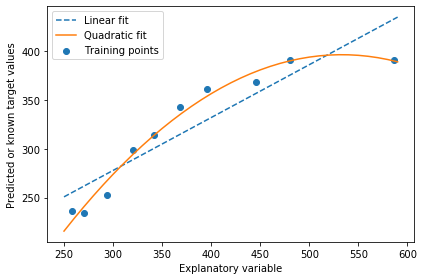

In [59]:
# 결과 그래프
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/10_11.png', dpi=300)
plt.show()

다항 회귀 모델이 선형 모델보다 특성과 타깃 사이의 관계를 훨씬 잘 잡아냈다.  

평가 지표로 MSE와 $R^2$값을 계산해보자.

In [60]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


## 주택 데이터셋을 사용한 비선형 관계 모델링

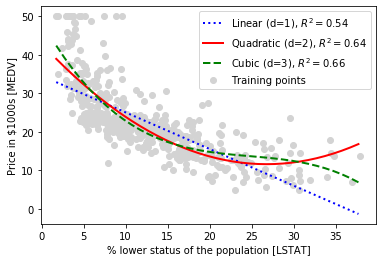

In [61]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

# plt.savefig('images/10_12.png', dpi=300)
plt.show()

그림에서 볼 수 있듯이 선형과 이차 다항 모델보다 삼차 다항 모델이 주택 가격과 LSTAT 사이의 관계를 잘 잡아냈다. 다항 특성을 많이 추가할수록 모델 복잡도가 높아지고 과대적합의 가능성이 증가한다는 것을 기억하라. 실전에서는 별도의 테스트 데이터셋에서 모델의 일반화 성능을 평가하는 것이 권장된다.  

또 다항 특성이 비선형 관계를 모델링하는 데 언제나 최선의 선택은 아니다. 

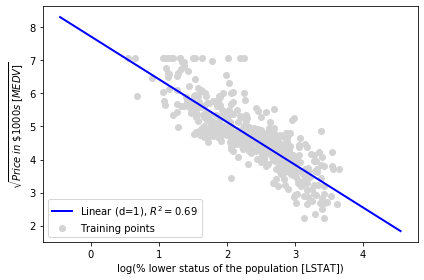

In [62]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# 특성을 변환합니다
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 결과 그래프를 그립니다
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
# plt.savefig('images/10_13.png', dpi=300)
plt.show()

# 랜덤 포레스트를 사용하여 비선형 관계 다루기

## 결정 트리 회귀

결정 트리 알고리즘의 장점은 비선형 데이터를 다룰 때 특성 변환이 필요하지 않다는 점이다.  
결정 트리는 가중치가 적용된 특성 조합을 고려하는 것이 아니라 한 번에 하나의 특성만 평가하기 때문이다.(따라서 결정 트리에서는 특성 정규화나 표준화가 필요하지 않다.)  

결정 트리 회귀에서는 MSE를 종종 **노드 내 분산**(within-node variance)이라고도 한다. 이런 이유로 이 분할 기준을 **분산 감소**(variance reduction)라고 많이 부른다.

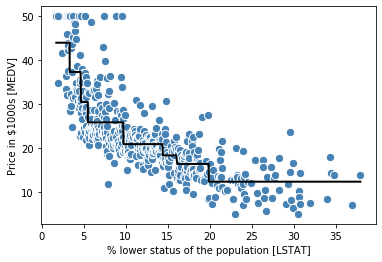

In [63]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
# plt.savefig('images/10_14.png', dpi=300)
plt.show()

결정 트리는 데이터에 있는 일반적인 경향을 잡아낸다. 기대하는 예측이 연속적이고 매끄러운 경우를 나타내지 못하는 것이 이 모델의 한계이다. 또 데이터에 과대적합되거나 과소적합되지 않도록 적절한 트리의 깊이를 주의 깊게 선택해야 한다. 여기선느 깊이 3이 좋은 선택인 것 같다.

## 랜덤 포레스트 회귀

랜덤 포레스트 알고리즘은 여러 개의 결정 트리를 연결하는 앙상블 방법이다. 랜덤 포레스트는 일반적으로 단일 결정 트리보다 더 나은 일반화 성능을 낸다. 무작위성이 모델의 분산을 낮추어 주기 때문이다.  
랜덤포레스트의 다른 장점은 데이터셋에 있는 이상치에 덜 민감하고 하이퍼파라미터 튜닝이 많이 필요하지 않다는 것이다. 일반적으로 랜덤 포레스트에서 튜닝할 유일한 하이퍼파라미터는 앙상블의 트리 개수이다.

In [64]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 1.644, 테스트 MSE: 11.085
훈련 R^2: 0.979, 테스트 R^2: 0.877


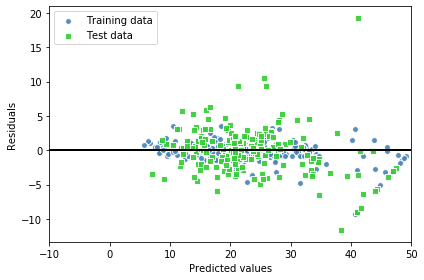

In [73]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_15.png', dpi=300)
plt.show()